<a href="https://colab.research.google.com/github/ammarkhan98/Ammar_MyOrder/blob/main/Research_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# 1. Download the dataset from the same source
url = "https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

In [2]:
data.shape

(196246, 16)

In [3]:
# 2. Data Preprocessing
# Fill missing values with forward fill (for time series continuity) and drop rows where critical columns are still missing
df = data[['date', 'location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].ffill().dropna()

# Convert date to datetime and extract the day of the year as a numerical feature
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear

# Features and target
features = df[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
target = df['daily_vaccinations']

In [4]:
df.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,day_of_year
78,2021-05-11,Afghanistan,504502.0,448878.0,55624.0,13921.0,131
79,2021-05-12,Afghanistan,504502.0,448878.0,55624.0,12621.0,132
80,2021-05-13,Afghanistan,504502.0,448878.0,55624.0,11321.0,133
81,2021-05-14,Afghanistan,504502.0,448878.0,55624.0,10022.0,134
82,2021-05-15,Afghanistan,504502.0,448878.0,55624.0,8722.0,135


In [5]:
# create a data frame that just contain locations which are countries (not a continent or area)

#df_countries = df[~df['location'].isin(['World', 'Asia', 'Europe', 'European Union', 'North America', 'South America', 'Africa', 'Oceania'])]

In [6]:
#create dataset that just contains data for continents

df_continents = df[df['location'].isin(['World', 'Asia', 'Europe', 'European Union', 'North America', 'South America', 'Africa', 'Oceania'])]

In [7]:
df_continents

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,day_of_year
1043,2021-01-09,Africa,0.000000e+00,0.000000e+00,1.837039e+07,0.0,9
1044,2021-01-10,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,10
1045,2021-01-11,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,11
1046,2021-01-12,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,12
1047,2021-01-13,Africa,2.000000e+03,2.000000e+03,1.837039e+07,500.0,13
...,...,...,...,...,...,...,...
193893,2024-08-10,World,1.357876e+10,5.631264e+09,5.177943e+09,1340.0,223
193894,2024-08-11,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,224
193895,2024-08-12,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,225
193896,2024-08-13,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,226


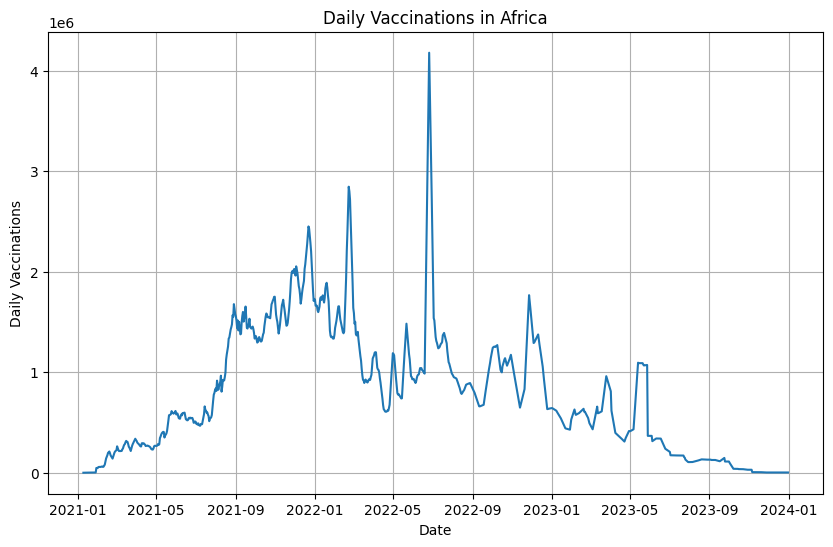

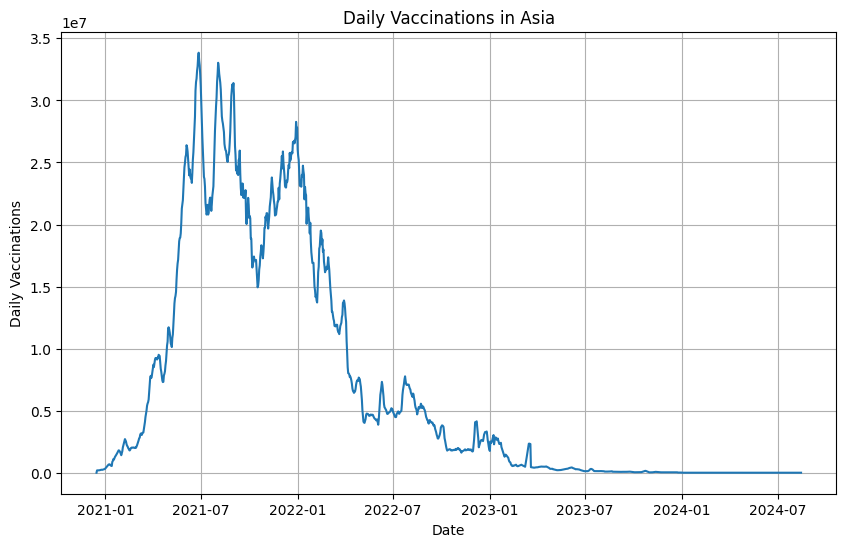

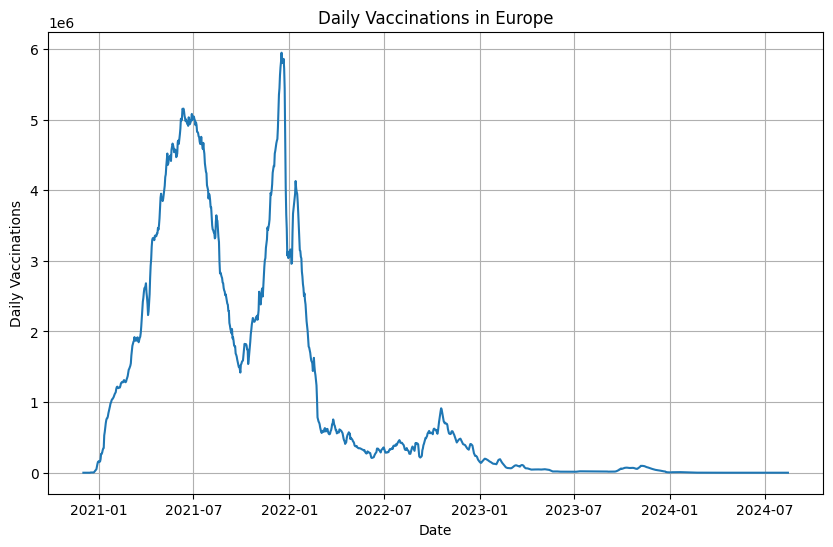

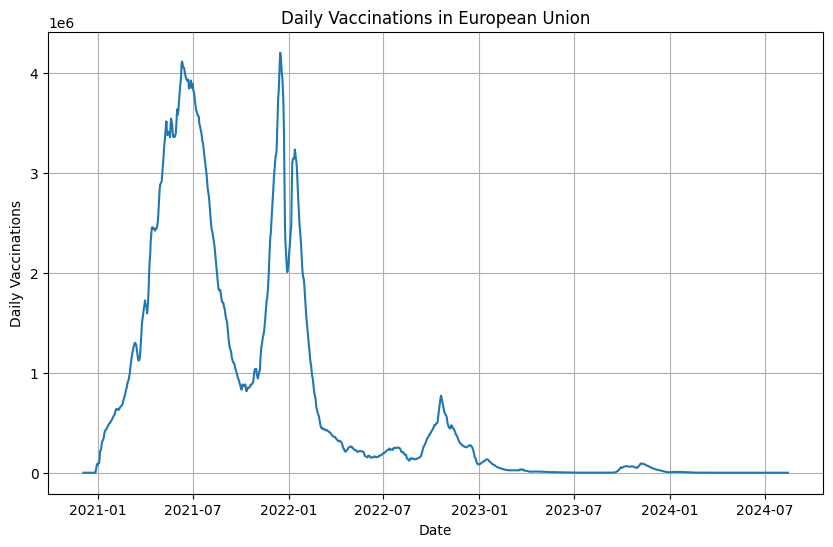

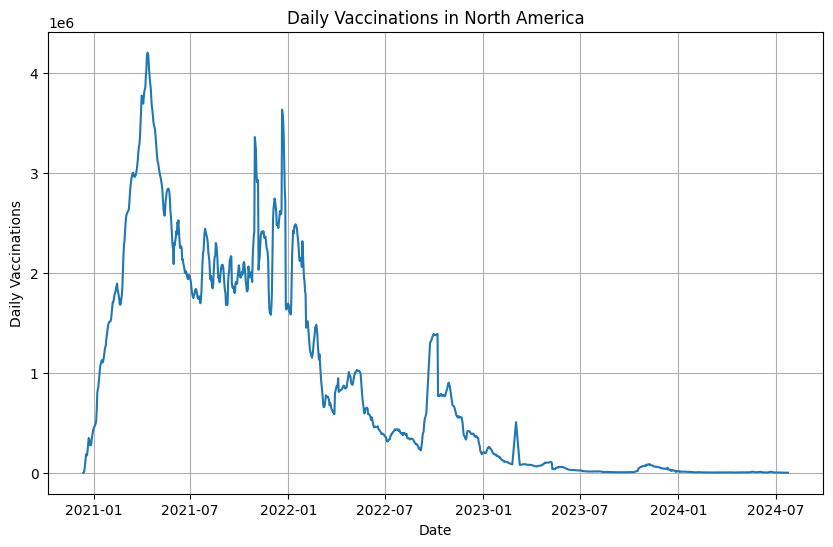

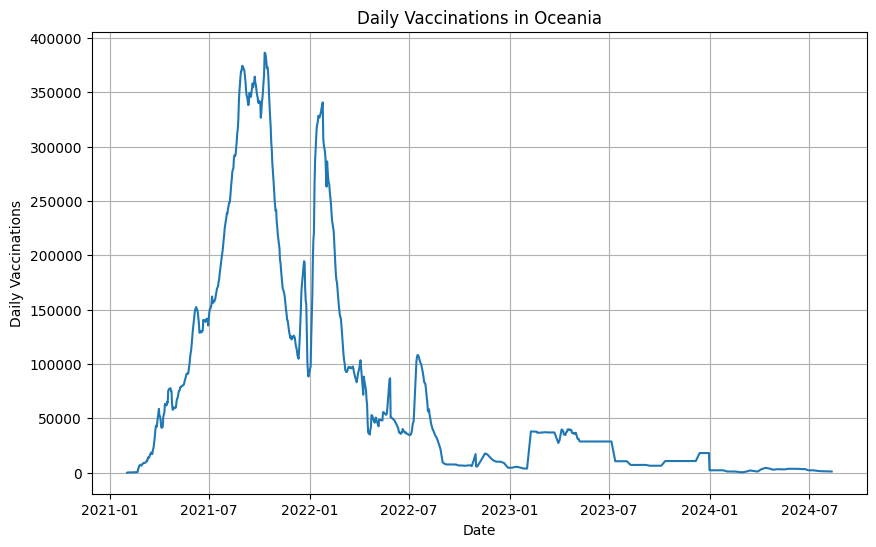

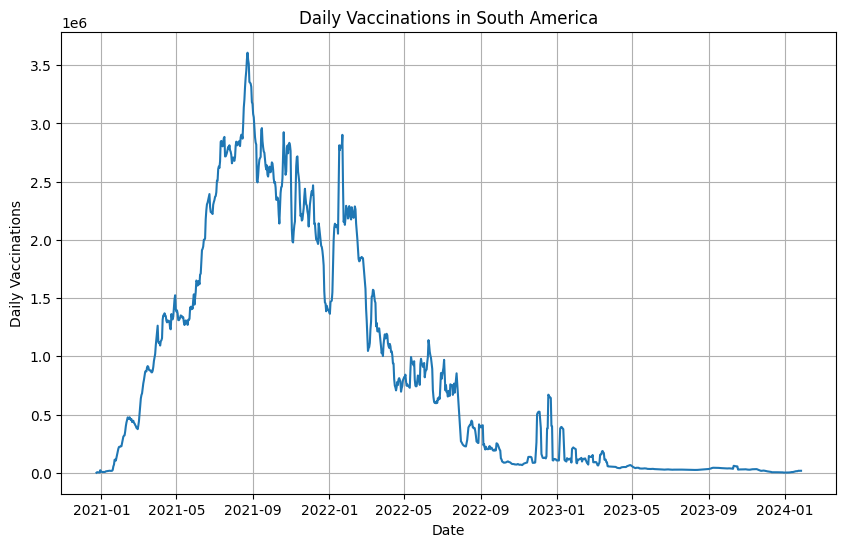

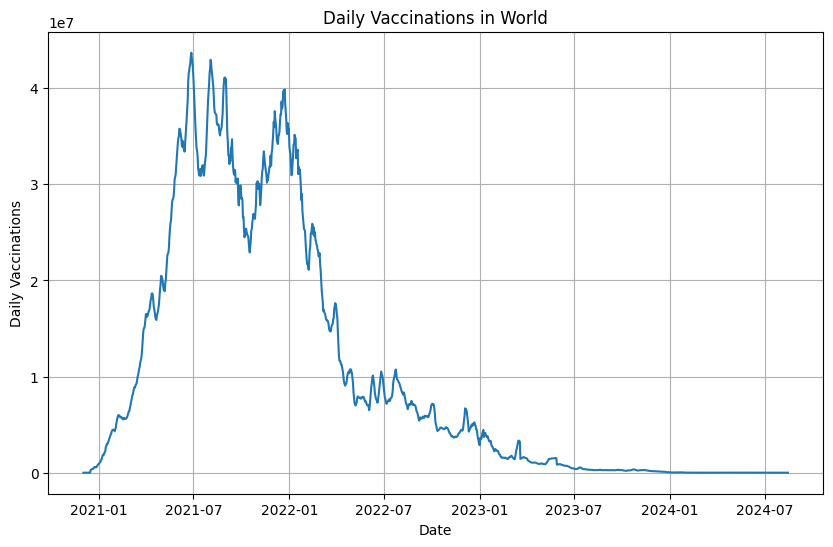

In [8]:
#show graph of each continent for daily vaccinations

import matplotlib.pyplot as plt

for continent in df_continents['location'].unique():
  df_continent = df_continents[df_continents['location'] == continent]
  plt.figure(figsize=(10, 6))
  plt.plot(df_continent['date'], df_continent['daily_vaccinations'])
  plt.title(f'Daily Vaccinations in {continent}')
  plt.xlabel('Date')
  plt.ylabel('Daily Vaccinations')
  plt.grid(True)
  plt.show()


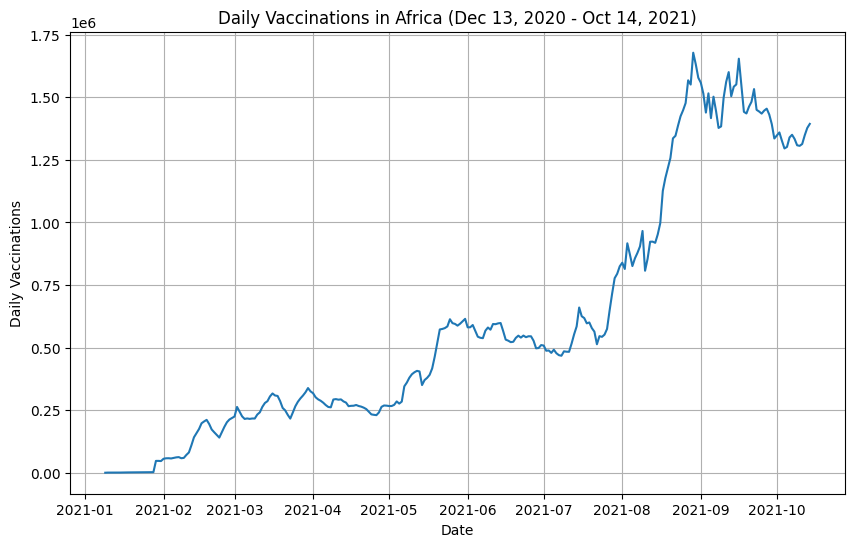

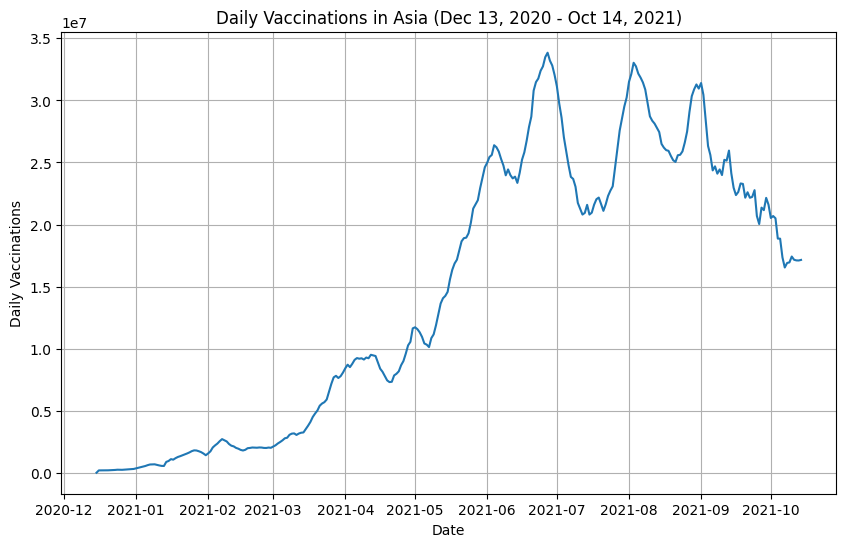

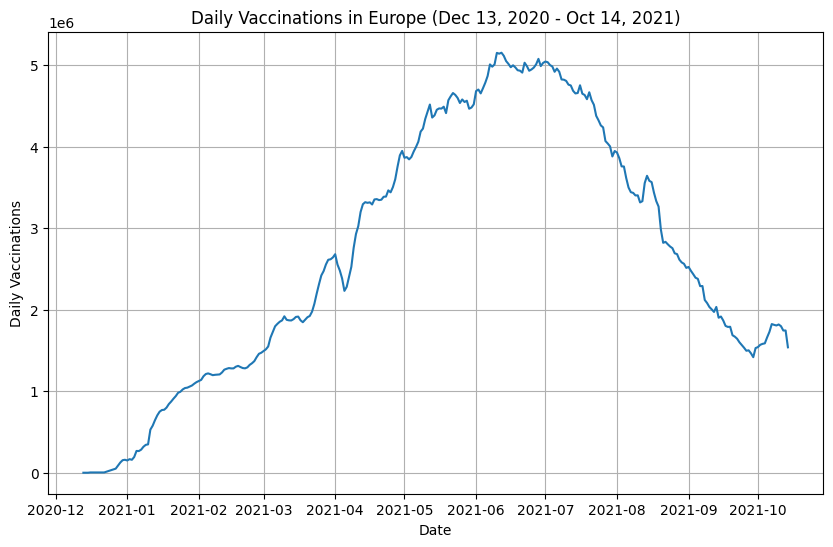

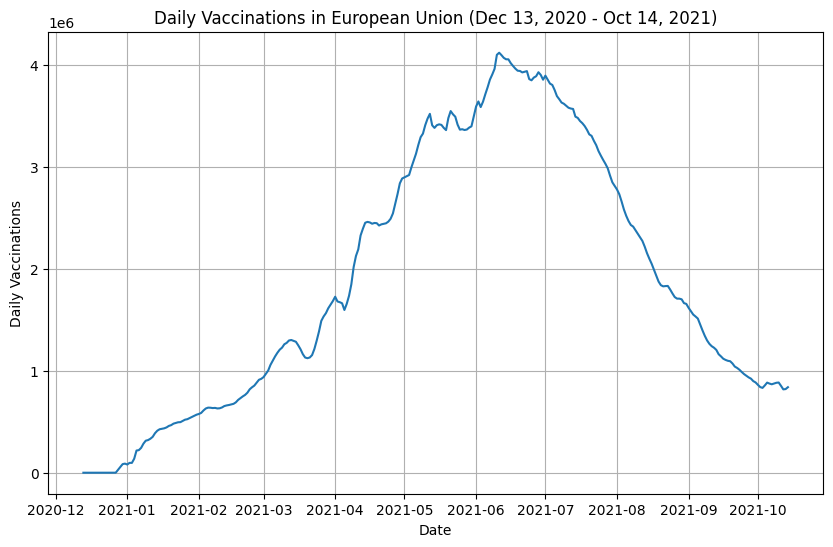

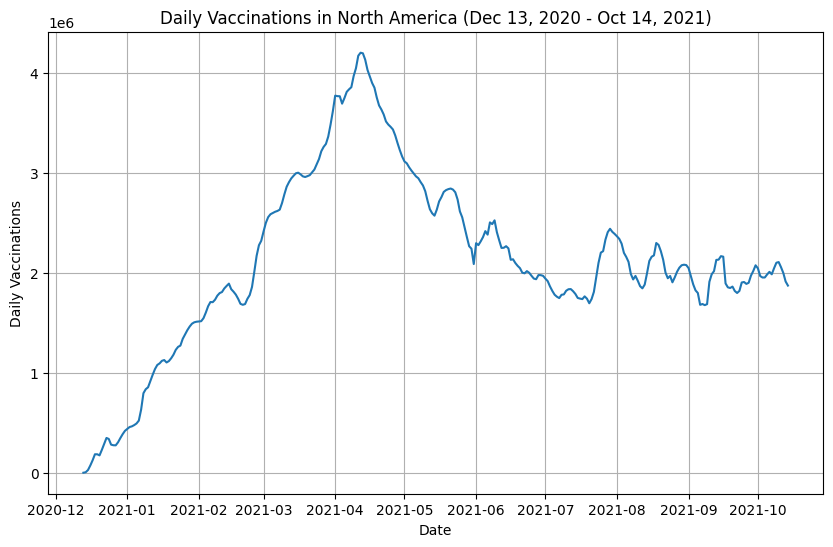

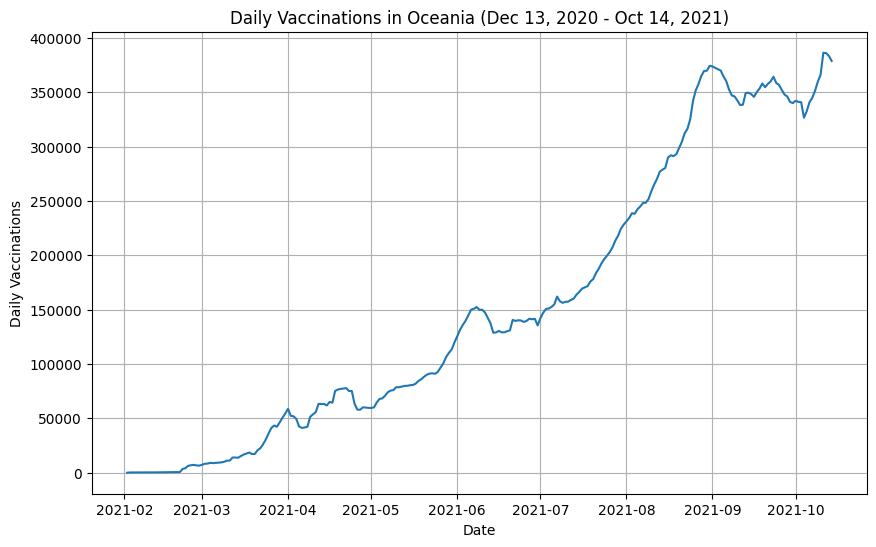

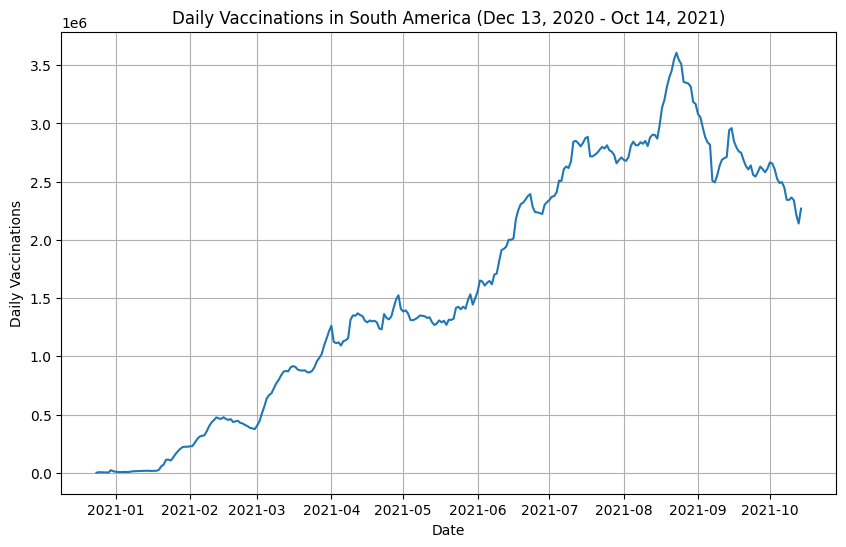

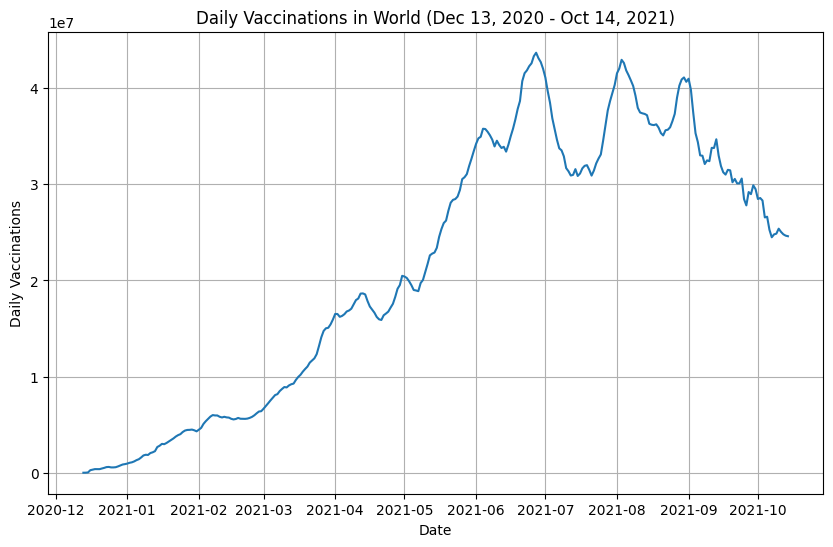

In [9]:
#create graphs again from the 13th of December 2020 to the 14th of October 2021.

import matplotlib.pyplot as plt
for continent in df_continents['location'].unique():
  df_continent = df_continents[df_continents['location'] == continent]
  df_continent = df_continent[(df_continent['date'] >= '2020-12-13') & (df_continent['date'] <= '2021-10-14')]
  plt.figure(figsize=(10, 6))
  plt.plot(df_continent['date'], df_continent['daily_vaccinations'])
  plt.title(f'Daily Vaccinations in {continent} (Dec 13, 2020 - Oct 14, 2021)')
  plt.xlabel('Date')
  plt.ylabel('Daily Vaccinations')
  plt.grid(True)
  plt.show()

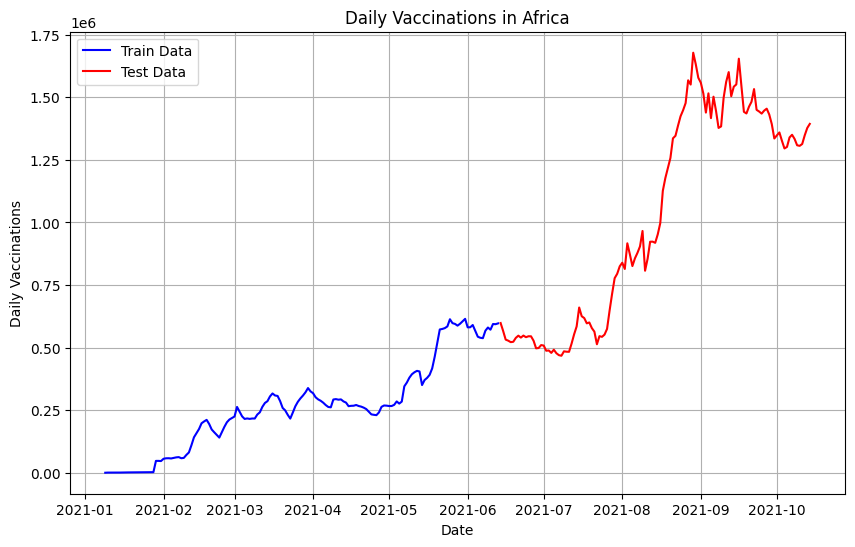

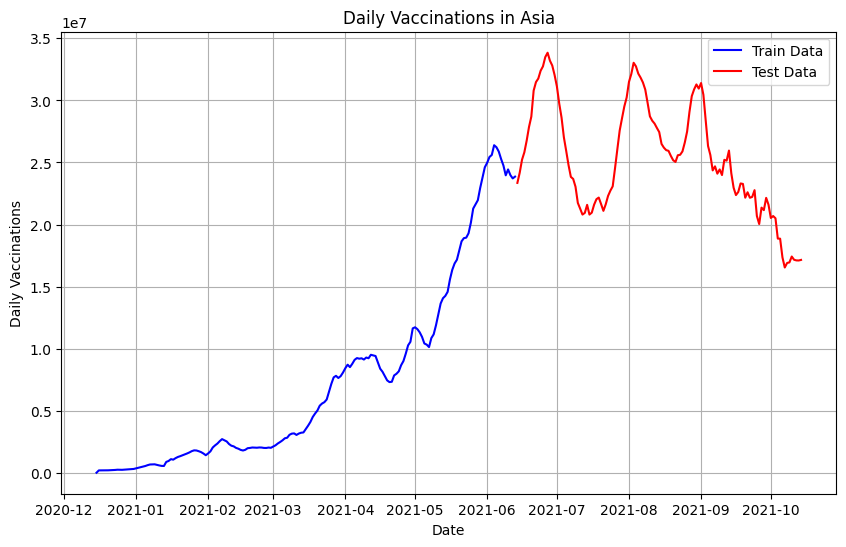

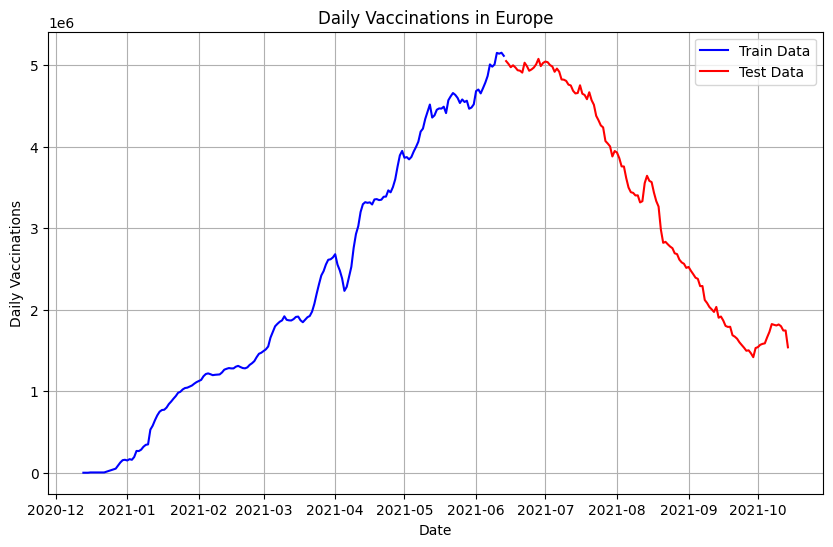

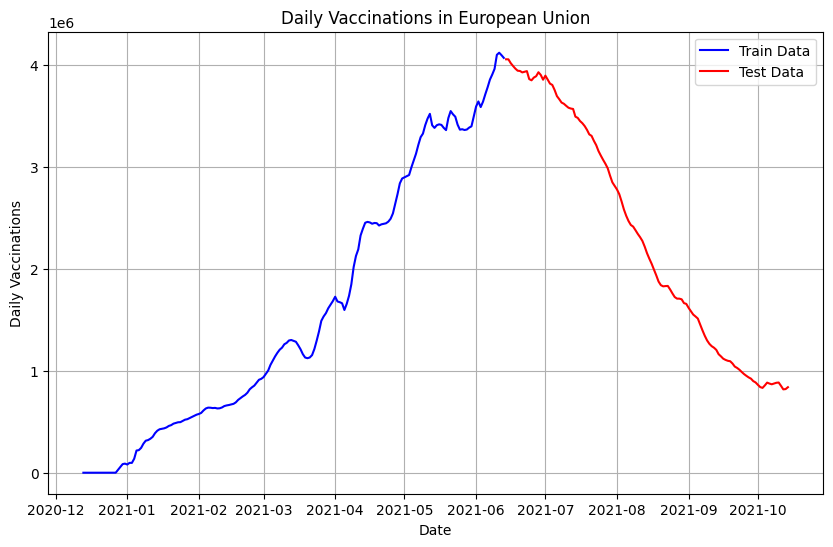

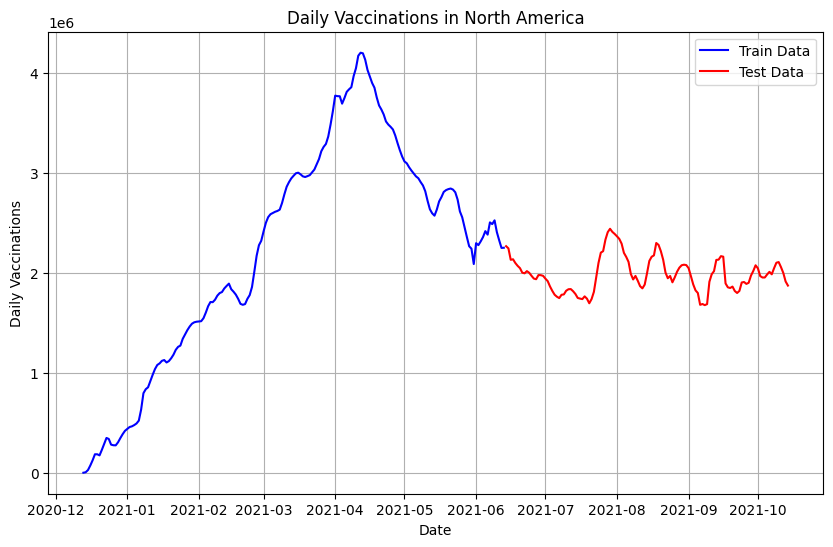

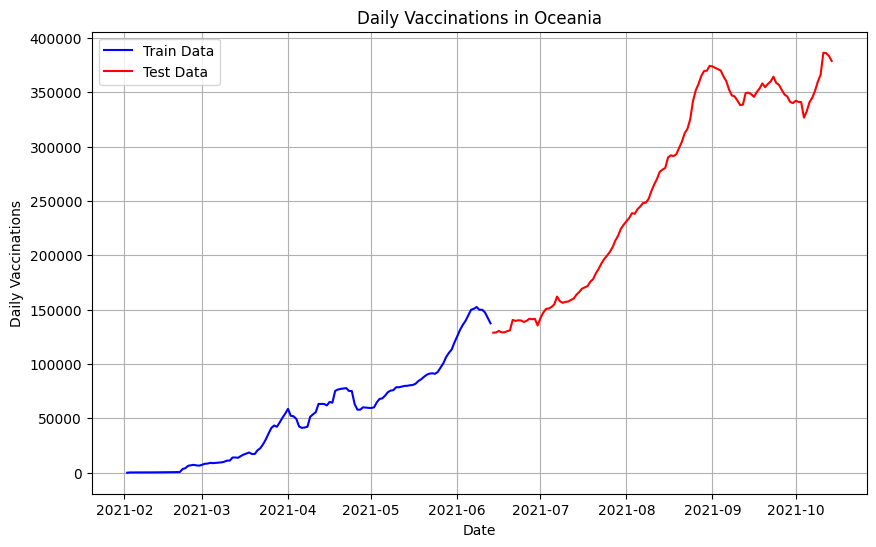

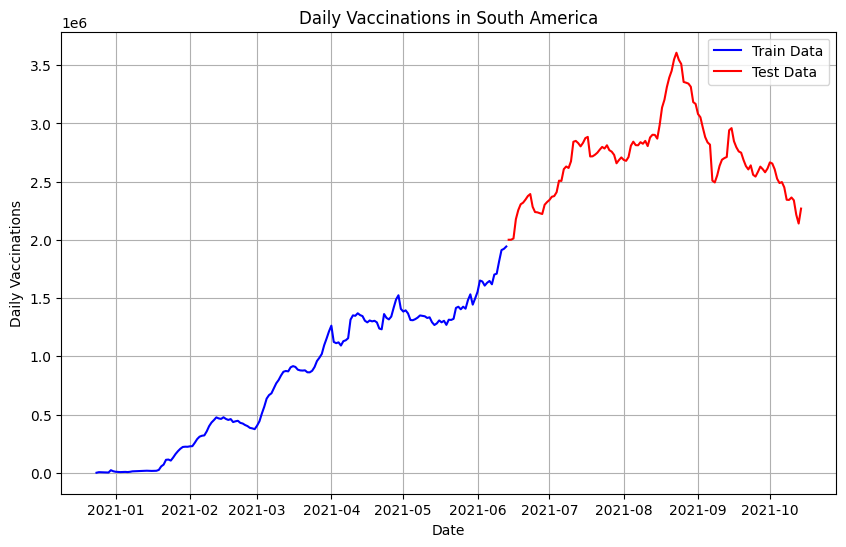

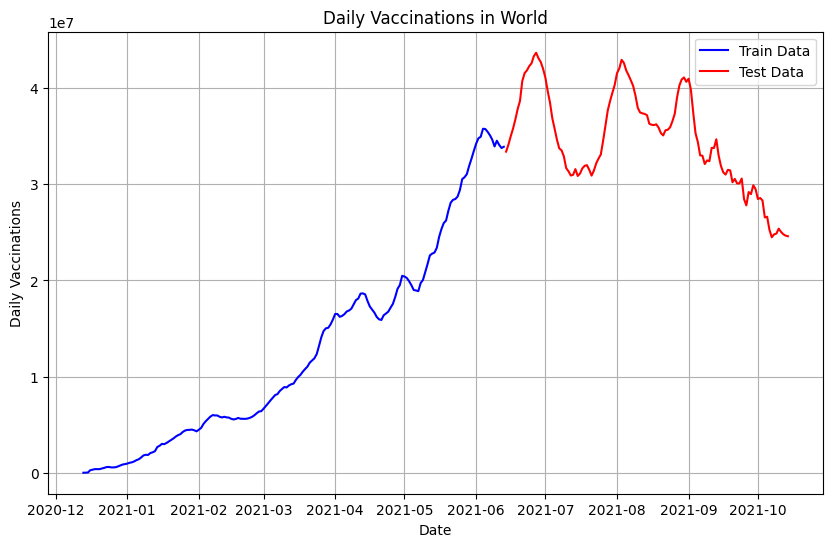

In [10]:
#create graphs again and use different blue for daily data from the 13th of December 2020 to the 13th of June 2021,  and red from the 14th of June 2021 to the 14th of October 2021, label the blue part of graph as train data, and red part of graph as test data

import matplotlib.pyplot as plt

for continent in df_continents['location'].unique():
    df_continent = df_continents[df_continents['location'] == continent]
    plt.figure(figsize=(10, 6))

    # Filter data for the specified date ranges
    train_data = df_continent[(df_continent['date'] >= '2020-12-13') & (df_continent['date'] <= '2021-06-13')]
    test_data = df_continent[(df_continent['date'] >= '2021-06-14') & (df_continent['date'] <= '2021-10-14')]

    # Plot the train data in blue
    plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

    # Plot the test data in red
    plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')


    plt.title(f'Daily Vaccinations in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.grid(True)
    plt.legend()  # Show the legend for train and test data
    plt.show()


In [11]:
#create train and test dataframe for each continent based on 13th of December 2020 to the 13th of June 2021 as train, while the testing dataset is comprised of COVID-19 daily data from the 14th of June 2021 to the 14th of October 2021.

train_dfs = {}
test_dfs = {}

for continent in df_continents['location'].unique():
    df_continent = df_continents[df_continents['location'] == continent]

    train_data = df_continent[(df_continent['date'] >= '2020-12-13') & (df_continent['date'] <= '2021-06-13')]
    test_data = df_continent[(df_continent['date'] >= '2021-06-14') & (df_continent['date'] <= '2021-10-14')]

    train_dfs[continent] = train_data
    test_dfs[continent] = test_data

In [12]:
#show shape of each of these train and test data for each continent separately (first world, then asia, ...) and head of each

for continent in df_continents['location'].unique():
  print(f"Continent: {continent}")
  print("Train Data Shape:", train_dfs[continent].shape)
  print("Test Data Shape:", test_dfs[continent].shape)
  print("\n")


Continent: Africa
Train Data Shape: (156, 7)
Test Data Shape: (123, 7)


Continent: Asia
Train Data Shape: (181, 7)
Test Data Shape: (123, 7)


Continent: Europe
Train Data Shape: (183, 7)
Test Data Shape: (123, 7)


Continent: European Union
Train Data Shape: (183, 7)
Test Data Shape: (123, 7)


Continent: North America
Train Data Shape: (183, 7)
Test Data Shape: (123, 7)


Continent: Oceania
Train Data Shape: (132, 7)
Test Data Shape: (123, 7)


Continent: South America
Train Data Shape: (172, 7)
Test Data Shape: (123, 7)


Continent: World
Train Data Shape: (183, 7)
Test Data Shape: (123, 7)




In [13]:
# Feature Selection for Different Models

# Create a dictionary to store feature sets for each model and continent
feature_sets = {}

for continent in df_continents['location'].unique():
    feature_sets[continent] = {}

    # ARIMA
    feature_sets[continent]['ARIMA'] = ['daily_vaccinations']  # ARIMA primarily uses past values of the target

    # Prophet
    feature_sets[continent]['Prophet'] = ['date', 'daily_vaccinations']  # Prophet uses date and target for forecasting

    # LSTM
    feature_sets[continent]['LSTM'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

    # Exponential Smoothing
    feature_sets[continent]['Exponential Smoothing'] = ['daily_vaccinations']

    # XGBoost, LightGBM
    feature_sets[continent]['XGBoost'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
    feature_sets[continent]['LightGBM'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

    # Elastic Net (ENET)
    feature_sets[continent]['ENET'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

    # CUBIST
    feature_sets[continent]['CUBIST'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

    # Gausian Process (GAUSS)
    feature_sets[continent]['GAUSS'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

    # Spikes and Slab (SPIKES)
    feature_sets[continent]['SPIKES'] = ['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']


# Create DataFrames for each model and continent based on selected features
model_dfs = {}

for continent in df_continents['location'].unique():
    model_dfs[continent] = {}
    for model_name, features in feature_sets[continent].items():
        model_dfs[continent][model_name] = train_dfs[continent][features]



In [14]:
#implement Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE) , and Mean Absolute Scaled Error (MASE)  functions and if there are missing values handle them,

import numpy as np

def relative_absolute_error(y_true, y_pred):
  """
  Calculate the Relative Absolute Error (RAE).

  Args:
    y_true: True values.
    y_pred: Predicted values.

  Returns:
    The RAE.
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  numerator = np.sum(np.abs(y_true - y_pred))
  denominator = np.sum(np.abs(y_true - np.mean(y_true)))

  if denominator == 0:
      return 0  # Avoid division by zero

  return numerator / denominator

def mean_squared_log_error(y_true, y_pred):
  """
  Calculate the Mean Squared Log Error (MSLE).

  Args:
    y_true: True values.
    y_pred: Predicted values.

  Returns:
    The MSLE.
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  # Handle potential issues with negative or zero values
  y_true = np.clip(y_true, 1e-10, float('inf'))
  y_pred = np.clip(y_pred, 1e-10, float('inf'))

  return np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred)))

def mean_absolute_scaled_error(y_true, y_pred, seasonality=1):
  """
  Calculate the Mean Absolute Scaled Error (MASE).

  Args:
    y_true: True values.
    y_pred: Predicted values.
    seasonality: The seasonality period (e.g., 7 for weekly data, 365 for yearly data).

  Returns:
    The MASE.
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  n = len(y_true)
  errors = np.abs(y_true - y_pred)

  # Calculate the mean absolute error of the naive forecast
  naive_errors = np.abs(y_true[seasonality:] - y_true[:-seasonality])
  mae_naive = np.mean(naive_errors)

  # Handle potential issues with zero or near-zero values
  if mae_naive == 0:
      return 0

  return np.mean(errors) / mae_naive

def handle_missing_values(df, method='ffill'):
    """
    Handle missing values in a DataFrame.

    Args:
        df: DataFrame with missing values.
        method: Method for filling missing values.
                'ffill': Forward fill.
                'bfill': Backward fill.
                'mean': Fill with the mean of the column.
                'median': Fill with the median of the column.

    Returns:
        DataFrame with missing values handled.
    """
    if method == 'ffill':
        return df.fillna(method='ffill')
    elif method == 'bfill':
        return df.fillna(method='bfill')
    elif method == 'mean':
        return df.fillna(df.mean())
    elif method == 'median':
        return df.fillna(df.median())
    else:
        raise ValueError(f"Unsupported method: {method}")




In [ ]:
#train and  test for ARIMA model for all continents and create  data frames for just Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE), and Mean Absolute Scaled Error (MASE) as a modelname_continent_metric also, modelname_continent_predictions for test data and show graph of prediction in the same graph of train and test

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output


arima_results = {}
arima_predictions_dfs = {}

for continent in df_continents['location'].unique():
    train_data = train_dfs[continent]
    test_data = test_dfs[continent]

    # Prepare the data for ARIMA
    train_data_arima = train_data[['date', 'daily_vaccinations']].set_index('date')
    test_data_arima = test_data[['date', 'daily_vaccinations']].set_index('date')

    # Train the ARIMA model
    try:
        model = ARIMA(train_data_arima['daily_vaccinations'], order=(5, 1, 0))  # Example order, adjust as needed
        model_fit = model.fit()

        # Make predictions on the test data
        predictions = model_fit.predict(start=len(train_data_arima), end=len(train_data_arima) + len(test_data_arima) - 1)

        # Evaluate the model
        mae = mean_absolute_error(test_data_arima['daily_vaccinations'], predictions)
        mse = mean_squared_error(test_data_arima['daily_vaccinations'], predictions)
        rmse = np.sqrt(mse)
        rae = relative_absolute_error(test_data_arima['daily_vaccinations'], predictions)
        msle = mean_squared_log_error(test_data_arima['daily_vaccinations'], predictions)
        mase = mean_absolute_scaled_error(test_data_arima['daily_vaccinations'], predictions, seasonality=7)

        # Store the results
        arima_results[f'ARIMA_{continent}_RAE'] = rae
        arima_results[f'ARIMA_{continent}_MSLE'] = msle
        arima_results[f'ARIMA_{continent}_MASE'] = mase
        arima_predictions_dfs[f'ARIMA_{continent}_predictions'] = pd.DataFrame({'date': test_data_arima.index, 'daily_vaccinations': test_data_arima['daily_vaccinations'], 'predictions': predictions})

        # Plot the train, test, and predictions
        plt.figure(figsize=(10, 6))

        plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')
        plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')
        plt.plot(test_data['date'], predictions, color='green', label='ARIMA Predictions')

        plt.title(f'Daily Vaccinations in {continent} with ARIMA Predictions')
        plt.xlabel('Date')
        plt.ylabel('Daily Vaccinations')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error training ARIMA model for {continent}: {e}")


# Create DataFrames for RAE, MSLE, and MASE
arima_rae_df = pd.DataFrame.from_dict(arima_results, orient='index', columns=['Value']).sort_index()
arima_msle_df = pd.DataFrame.from_dict(arima_results, orient='index', columns=['Value']).sort_index()
arima_mase_df = pd.DataFrame.from_dict(arima_results, orient='index', columns=['Value']).sort_index()

# Filter the DataFrames to include only the relevant metrics
arima_rae_df = arima_rae_df[arima_rae_df.index.str.contains('RAE')]
arima_msle_df = arima_msle_df[arima_msle_df.index.str.contains('MSLE')]
arima_mase_df = arima_mase_df[arima_mase_df.index.str.contains('MASE')]

# Show the results
print("\nARIMA RAE:")
print(arima_rae_df)
print("\nARIMA MSLE:")
print(arima_msle_df)
print("\nARIMA MASE:")
print(arima_mase_df)




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_log_error

# Custom Metric Functions
def relative_absolute_error(y_true, y_pred):
    numerator = sum(abs(y_true - y_pred))
    denominator = sum(abs(y_true - y_true.mean()))
    return numerator / denominator

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_train)
    mae = sum(abs(y_true - y_pred)) / len(y_true)
    naive_mae = sum(abs(y_train[1:] - y_train[:-1])) / (n - 1)
    return mae / naive_mae

# Create dictionaries to store metrics and predictions
prophet_continent_rae = {}
prophet_continent_msle = {}
prophet_continent_mase = {}
prophet_continent_predictions = {}

# Loop through each continent
for continent in df_continents['location'].unique():
    print(f"Training and testing Prophet for {continent}")

    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    # Prepare the data for Prophet
    train_prophet = train_data[['date', 'daily_vaccinations']].rename(columns={'date': 'ds', 'daily_vaccinations': 'y'})
    test_prophet = test_data[['date', 'daily_vaccinations']].rename(columns={'date': 'ds', 'daily_vaccinations': 'y'})

    # Fit the Prophet model
    model = Prophet()
    model.fit(train_prophet)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=len(test_prophet), freq='D')
    forecast = model.predict(future)

    # Extract predictions corresponding to test dates
    predictions = forecast.set_index('ds').loc[test_prophet['ds'], 'yhat']

    # Ensure no negative values in the data for MSLE
    if (test_prophet['y'] < 0).any() or (predictions < 0).any():
        print(f"Skipping MSLE calculation for {continent} due to negative values.")
        msle = None
    else:
        msle = mean_squared_log_error(test_prophet['y'].values, predictions.values)

    # Calculate metrics
    rae = relative_absolute_error(test_prophet['y'].values, predictions.values)
    mase = mean_absolute_scaled_error(test_prophet['y'].values, predictions.values, train_prophet['y'].values)

    # Store metrics and predictions
    prophet_continent_rae[f'Prophet_{continent}_RAE'] = rae
    prophet_continent_msle[f'Prophet_{continent}_MSLE'] = msle
    prophet_continent_mase[f'Prophet_{continent}_MASE'] = mase
    prophet_continent_predictions[f'Prophet_{continent}_predictions'] = predictions.values

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['date'], train_data['daily_vaccinations'], label='Train Data', color='blue')
    plt.plot(test_data['date'], test_data['daily_vaccinations'], label='Test Data', color='red')
    plt.plot(test_data['date'], predictions, label='Prophet Predictions', color='green')
    plt.title(f'Daily Vaccinations in {continent} with Prophet Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrames for metrics
prophet_rae_df = pd.DataFrame.from_dict(prophet_continent_rae, orient='index', columns=['RAE'])
prophet_msle_df = pd.DataFrame.from_dict(prophet_continent_msle, orient='index', columns=['MSLE'])
prophet_mase_df = pd.DataFrame.from_dict(prophet_continent_mase, orient='index', columns=['MASE'])

# Align predictions into a DataFrame with NaN padding for unequal lengths
max_length = max(len(pred) for pred in prophet_continent_predictions.values())
for key in prophet_continent_predictions:
    prophet_continent_predictions[key] = list(prophet_continent_predictions[key]) + [float('nan')] * (
        max_length - len(prophet_continent_predictions[key])
    )

# Create DataFrame for predictions
prophet_predictions_df = pd.DataFrame.from_dict(prophet_continent_predictions)

# Print DataFrames
print("Prophet RAE DataFrame:")
print(prophet_rae_df)

print("\nProphet MSLE DataFrame:")
print(prophet_msle_df)

print("\nProphet MASE DataFrame:")
print(prophet_mase_df)

print("\nProphet Predictions DataFrame:")
print(prophet_predictions_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

# Define metric functions
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_train)
    mae = np.mean(np.abs(y_true - y_pred))
    naive_mae = np.mean(np.abs(y_train[1:] - y_train[:-1]))
    return mae / naive_mae

# Dictionaries to store metrics and predictions
lstm_continent_rae = {}
lstm_continent_msle = {}
lstm_continent_mase = {}
lstm_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing LSTM for {continent}")

    # Prepare train and test data
    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    train_X = train_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    train_y = train_data['daily_vaccinations'].values
    test_X = test_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    test_y = test_data['daily_vaccinations'].values

    # Scale the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    train_X = scaler_X.fit_transform(train_X)
    train_y = scaler_y.fit_transform(train_y.reshape(-1, 1))
    test_X = scaler_X.transform(test_X)
    test_y = scaler_y.transform(test_y.reshape(-1, 1))

    # Reshape for LSTM
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(layers.LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(train_X, train_y, epochs=50, verbose=0)

    # Make predictions
    predictions = model.predict(test_X)

    # Inverse transform predictions and test_y
    predictions = scaler_y.inverse_transform(predictions).flatten()
    test_y = scaler_y.inverse_transform(test_y).flatten()

    # Clip negative values for MSLE
    predictions = np.clip(predictions, 0, None)
    test_y = np.clip(test_y, 0, None)

    # Calculate metrics
    rae = relative_absolute_error(test_y, predictions)
    msle = mean_squared_log_error(test_y, predictions)
    mase = mean_absolute_scaled_error(test_y, predictions, scaler_y.inverse_transform(train_y).flatten())

    # Store metrics and predictions
    lstm_continent_rae[f'LSTM_{continent}_RAE'] = rae
    lstm_continent_msle[f'LSTM_{continent}_MSLE'] = msle
    lstm_continent_mase[f'LSTM_{continent}_MASE'] = mase
    lstm_continent_predictions[f'LSTM_{continent}_predictions'] = predictions

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['date'], train_data['daily_vaccinations'], label='Train Data', color='blue')
    plt.plot(test_data['date'], test_data['daily_vaccinations'], label='Test Data', color='red')
    plt.plot(test_data['date'], predictions, label='LSTM Predictions', color='green')
    plt.title(f'Daily Vaccinations in {continent} with LSTM Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrames for metrics
lstm_rae_df = pd.DataFrame.from_dict(lstm_continent_rae, orient='index', columns=['RAE'])
lstm_msle_df = pd.DataFrame.from_dict(lstm_continent_msle, orient='index', columns=['MSLE'])
lstm_mase_df = pd.DataFrame.from_dict(lstm_continent_mase, orient='index', columns=['MASE'])

# Print DataFrames
print("LSTM RAE DataFrame:")
print(lstm_rae_df)

print("\nLSTM MSLE DataFrame:")
print(lstm_msle_df)

print("\nLSTM MASE DataFrame:")
print(lstm_mase_df)


In [ ]:
# train and  test for Exponential Smoothing for all continents and create  data frames for just Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE), and Mean Absolute Scaled Error (MASE) as a modelname_continent_metric also, modelname_continent_predictions for test data and show graph of prediction in the same graph of train and test

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es_continent_rae = {}
es_continent_msle = {}
es_continent_mase = {}
es_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing Exponential Smoothing for {continent}")

    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    # Prepare the data for Exponential Smoothing
    train_target = train_data['daily_vaccinations']
    test_target = test_data['daily_vaccinations']

    # Fit the Exponential Smoothing model
    try:
        model = ExponentialSmoothing(train_target, trend='add', seasonal='add', seasonal_periods=7)  # You can adjust the parameters
        model_fit = model.fit()

        # Make predictions on the test data
        predictions = model_fit.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1)

        # Calculate metrics
        rae = relative_absolute_error(test_target, predictions)
        msle = mean_squared_log_error(test_target, predictions)
        mase = mean_absolute_scaled_error(test_target, predictions, train_target)

        # Store the metrics
        es_continent_rae[f'ES_{continent}_RAE'] = rae
        es_continent_msle[f'ES_{continent}_MSLE'] = msle
        es_continent_mase[f'ES_{continent}_MASE'] = mase
        es_continent_predictions[f'ES_{continent}_predictions'] = predictions


        # Plot the results
        plt.figure(figsize=(10, 6))

        # Plot the train data in blue
        plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

        # Plot the test data in red
        plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')

        # Plot the predictions in green
        plt.plot(test_data['date'], predictions, color='green', label='Exponential Smoothing Predictions')

        plt.title(f'Daily Vaccinations in {continent} with Exponential Smoothing Predictions')
        plt.xlabel('Date')
        plt.ylabel('Daily Vaccinations')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error training Exponential Smoothing for {continent}: {e}")
        # Handle the error appropriately (e.g., log it or skip the continent)


# Create DataFrames for RAE, MSLE, and MASE
es_rae_df = pd.DataFrame.from_dict(es_continent_rae, orient='index', columns=['RAE'])
es_msle_df = pd.DataFrame.from_dict(es_continent_msle, orient='index', columns=['MSLE'])
es_mase_df = pd.DataFrame.from_dict(es_continent_mase, orient='index', columns=['MASE'])


# Create DataFrame for predictions
es_predictions_df = pd.DataFrame.from_dict(es_continent_predictions, orient='index', columns=['Predictions'])


print("Exponential Smoothing RAE DataFrame:")
print(es_rae_df)

print("\nExponential Smoothing MSLE DataFrame:")
print(es_msle_df)

print("\nExponential Smoothing MASE DataFrame:")
print(es_mase_df)

print("\nExponential Smoothing Predictions DataFrame:")
print(es_predictions_df)


In [ ]:
#train and  test for XGBoost for all continents and create  data frames for just Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE), and Mean Absolute Scaled Error (MASE) as a modelname_continent_metric also, modelname_continent_predictions for test data and show graph of prediction in the same graph of train and test

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


xgboost_continent_rae = {}
xgboost_continent_msle = {}
xgboost_continent_mase = {}
xgboost_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing XGBoost for {continent}")

    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    # Prepare the data for XGBoost
    train_X = train_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    train_y = train_data['daily_vaccinations'].values
    test_X = test_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    test_y = test_data['daily_vaccinations'].values

    # Scale the data
    scaler_X = StandardScaler()
    train_X = scaler_X.fit_transform(train_X)
    test_X = scaler_X.transform(test_X)

    # Create XGBoost model
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

    # Train the model
    model.fit(train_X, train_y)

    # Make predictions
    predictions = model.predict(test_X)

    # Calculate metrics
    rae = relative_absolute_error(test_y, predictions)
    msle = mean_squared_log_error(test_y, predictions)
    mase = mean_absolute_scaled_error(test_y, predictions, train_y)

    # Store the metrics
    xgboost_continent_rae[f'XGBoost_{continent}_RAE'] = rae
    xgboost_continent_msle[f'XGBoost_{continent}_MSLE'] = msle
    xgboost_continent_mase[f'XGBoost_{continent}_MASE'] = mase
    xgboost_continent_predictions[f'XGBoost_{continent}_predictions'] = predictions

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot the train data in blue
    plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

    # Plot the test data in red
    plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')

    # Plot the predictions in green
    plt.plot(test_data['date'], predictions, color='green', label='XGBoost Predictions')

    plt.title(f'Daily Vaccinations in {continent} with XGBoost Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create DataFrames for RAE, MSLE, and MASE
xgboost_rae_df = pd.DataFrame.from_dict(xgboost_continent_rae, orient='index', columns=['RAE'])
xgboost_msle_df = pd.DataFrame.from_dict(xgboost_continent_msle, orient='index', columns=['MSLE'])
xgboost_mase_df = pd.DataFrame.from_dict(xgboost_continent_mase, orient='index', columns=['MASE'])


print("XGBoost RAE DataFrame:")
print(xgboost_rae_df)

print("\nXGBoost MSLE DataFrame:")
print(xgboost_msle_df)

print("\nXGBoost MASE DataFrame:")
print(xgboost_mase_df)



In [ ]:
# train and  test for LightGBM for all continents and create  data frames for just Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE), and Mean Absolute Scaled Error (MASE) as a modelname_continent_metric also, modelname_continent_predictions for test data and show graph of prediction in the same graph of train and test and turn off all LightGBM  warnings

import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  # Turn off LightGBM warnings

lightgbm_continent_rae = {}
lightgbm_continent_msle = {}
lightgbm_continent_mase = {}
lightgbm_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing LightGBM for {continent}")

    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    # Prepare the data for LightGBM
    train_X = train_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    train_y = train_data['daily_vaccinations'].values
    test_X = test_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    test_y = test_data['daily_vaccinations'].values

    # Scale the data
    scaler_X = StandardScaler()
    train_X = scaler_X.fit_transform(train_X)
    test_X = scaler_X.transform(test_X)

    # Create LightGBM model
    model = lgb.LGBMRegressor(verbose=-1)

    # Train the model
    model.fit(train_X, train_y)

    # Make predictions
    predictions = model.predict(test_X)

    # Calculate metrics
    rae = relative_absolute_error(test_y, predictions)
    msle = mean_squared_log_error(test_y, predictions)
    mase = mean_absolute_scaled_error(test_y, predictions, train_y)

    # Store the metrics
    lightgbm_continent_rae[f'LightGBM_{continent}_RAE'] = rae
    lightgbm_continent_msle[f'LightGBM_{continent}_MSLE'] = msle
    lightgbm_continent_mase[f'LightGBM_{continent}_MASE'] = mase
    lightgbm_continent_predictions[f'LightGBM_{continent}_predictions'] = predictions

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot the train data in blue
    plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

    # Plot the test data in red
    plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')

    # Plot the predictions in green
    plt.plot(test_data['date'], predictions, color='green', label='LightGBM Predictions')

    plt.title(f'Daily Vaccinations in {continent} with LightGBM Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create DataFrames for RAE, MSLE, and MASE
lightgbm_rae_df = pd.DataFrame.from_dict(lightgbm_continent_rae, orient='index', columns=['RAE'])
lightgbm_msle_df = pd.DataFrame.from_dict(lightgbm_continent_msle, orient='index', columns=['MSLE'])
lightgbm_mase_df = pd.DataFrame.from_dict(lightgbm_continent_mase, orient='index', columns=['MASE'])

print("LightGBM RAE DataFrame:")
print(lightgbm_rae_df)

print("\nLightGBM MSLE DataFrame:")
print(lightgbm_msle_df)

print("\nLightGBM MASE DataFrame:")
print(lightgbm_mase_df)


In [ ]:
# train and  test for Elastic Net (ENET)  for all continents and create  data frames for just Relative Absolute Error (RAE) by, Mean Squared Log Error (MSLE), and Mean Absolute Scaled Error (MASE) as a modelname_continent_metric also, modelname_continent_predictions for test data and show graph of prediction in the same graph of train and test

import pandas as pd
import matplotlib.pyplot as plt
enet_continent_rae = {}
enet_continent_msle = {}
enet_continent_mase = {}
enet_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing Elastic Net for {continent}")

    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    # Prepare the data for Elastic Net
    train_X = train_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    train_y = train_data['daily_vaccinations'].values
    test_X = test_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    test_y = test_data['daily_vaccinations'].values

    # Scale the data
    scaler_X = StandardScaler()
    train_X = scaler_X.fit_transform(train_X)
    test_X = scaler_X.transform(test_X)

    # Create Elastic Net model
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)

    # Train the model
    model.fit(train_X, train_y)

    # Make predictions
    predictions = model.predict(test_X)

    # Calculate metrics
    rae = relative_absolute_error(test_y, predictions)
    msle = mean_squared_log_error(test_y, predictions)
    mase = mean_absolute_scaled_error(test_y, predictions, train_y)

    # Store the metrics
    enet_continent_rae[f'ENET_{continent}_RAE'] = rae
    enet_continent_msle[f'ENET_{continent}_MSLE'] = msle
    enet_continent_mase[f'ENET_{continent}_MASE'] = mase
    enet_continent_predictions[f'ENET_{continent}_predictions'] = predictions

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot the train data in blue
    plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

    # Plot the test data in red
    plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')

    # Plot the predictions in green
    plt.plot(test_data['date'], predictions, color='green', label='ENET Predictions')

    plt.title(f'Daily Vaccinations in {continent} with Elastic Net Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create DataFrames for RAE, MSLE, and MASE
enet_rae_df = pd.DataFrame.from_dict(enet_continent_rae, orient='index', columns=['RAE'])
enet_msle_df = pd.DataFrame.from_dict(enet_continent_msle, orient='index', columns=['MSLE'])
enet_mase_df = pd.DataFrame.from_dict(enet_continent_mase, orient='index', columns=['MASE'])

print("Elastic Net RAE DataFrame:")
print(enet_rae_df)

print("\nElastic Net MSLE DataFrame:")
print(enet_msle_df)

print("\nElastic Net MASE DataFrame:")
print(enet_mase_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

# Define metric functions
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_train)
    mae = np.mean(np.abs(y_true - y_pred))
    naive_mae = np.mean(np.abs(y_train[1:] - y_train[:-1]))
    return mae / naive_mae

# Create dictionaries to store metrics and predictions
gauss_continent_rae = {}
gauss_continent_msle = {}
gauss_continent_mase = {}
gauss_continent_predictions = {}

for continent in df_continents['location'].unique():
    print(f"Training and testing Gaussian Process for {continent}")

    # Prepare train and test data
    train_data = train_dfs[continent].copy()
    test_data = test_dfs[continent].copy()

    train_X = train_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    train_y = train_data['daily_vaccinations'].values
    test_X = test_data[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values
    test_y = test_data['daily_vaccinations'].values

    # Scale the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    train_X = scaler_X.fit_transform(train_X)
    train_y = scaler_y.fit_transform(train_y.reshape(-1, 1)).flatten()
    test_X = scaler_X.transform(test_X)
    test_y = scaler_y.transform(test_y.reshape(-1, 1)).flatten()

    # Create Gaussian Process model
    model = GaussianProcessRegressor()

    # Train the model
    model.fit(train_X, train_y)

    # Make predictions
    predictions = model.predict(test_X)

    # Inverse transform predictions and test_y for metrics
    predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1)).flatten()

    # Clip negative values for MSLE
    predictions = np.clip(predictions, 0, None)
    test_y = np.clip(test_y, 0, None)

    # Calculate metrics
    rae = relative_absolute_error(test_y, predictions)
    msle = mean_squared_log_error(test_y, predictions)
    mase = mean_absolute_scaled_error(test_y, predictions, scaler_y.inverse_transform(train_y.reshape(-1, 1)).flatten())

    # Store metrics and predictions
    gauss_continent_rae[f'GAUSS_{continent}_RAE'] = rae
    gauss_continent_msle[f'GAUSS_{continent}_MSLE'] = msle
    gauss_continent_mase[f'GAUSS_{continent}_MASE'] = mase
    gauss_continent_predictions[f'GAUSS_{continent}_predictions'] = predictions

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['date'], train_data['daily_vaccinations'], label='Train Data', color='blue')
    plt.plot(test_data['date'], test_data['daily_vaccinations'], label='Test Data', color='red')
    plt.plot(test_data['date'], predictions, label='Gaussian Process Predictions', color='green')
    plt.title(f'Daily Vaccinations in {continent} with Gaussian Process Predictions')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrames for RAE, MSLE, and MASE
gauss_rae_df = pd.DataFrame.from_dict(gauss_continent_rae, orient='index', columns=['RAE'])
gauss_msle_df = pd.DataFrame.from_dict(gauss_continent_msle, orient='index', columns=['MSLE'])
gauss_mase_df = pd.DataFrame.from_dict(gauss_continent_mase, orient='index', columns=['MASE'])

# Print DataFrames
print("Gaussian Process RAE DataFrame:")
print(gauss_rae_df)

print("\nGaussian Process MSLE DataFrame:")
print(gauss_msle_df)

print("\nGaussian Process MASE DataFrame:")
print(gauss_mase_df)


In [ ]:
#Future work is to focus on hybrid models such as ARIMA-LSTM and comparing LSTM and ARIMA side by side based on the differences, to be continued...